# Mathematical Modelling for Neural Science and Engineering: Coursework 2 Answers

In [7]:
# Author CID: 02303294
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import random

def generate_ER(n, p, average_degree): #Erdos-Renyi Network function generation
    G = nx.Graph()
    G.add_nodes_from(range(n)) #n = number of nodes in my network
    edge_prob = average_degree / (n-1) #Probability of edge

    # Add edges with probability p = theoretical clustering co-efficient
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    
    return G

#%% SECTION 1
# Delta_F/F flourescence time series for all neurons

#channel 1 
dFonF1 = np.load("data/DFF_file3_ch1.npy")
#interval is equal to the size of cells measured from channel 1 (or channel 2, doesn't matter)
nframes = np.size(dFonF1,1)  
# channel 2
dFonF2 = np.load("data/DFF_file3_ch2.npy")  
#combining both channels 
''' 
    dFonF rows = 4255 (channel 1)
    dFonF columns = 5680 (channel 2)
    dFonF(4255 x 5680) (all cells)
'''
dFonF = np.concatenate((dFonF1,dFonF2[:,0:nframes])) # dFonF2[:, 0:nframes]--> get all te rows from row 1 to nframes of channel 2, so that they are the same size
ncells = np.size(dFonF,0)  # all the no of cells (both channel 1 and 2)


SECTION 2- Loading and Extracting data from the given dataset

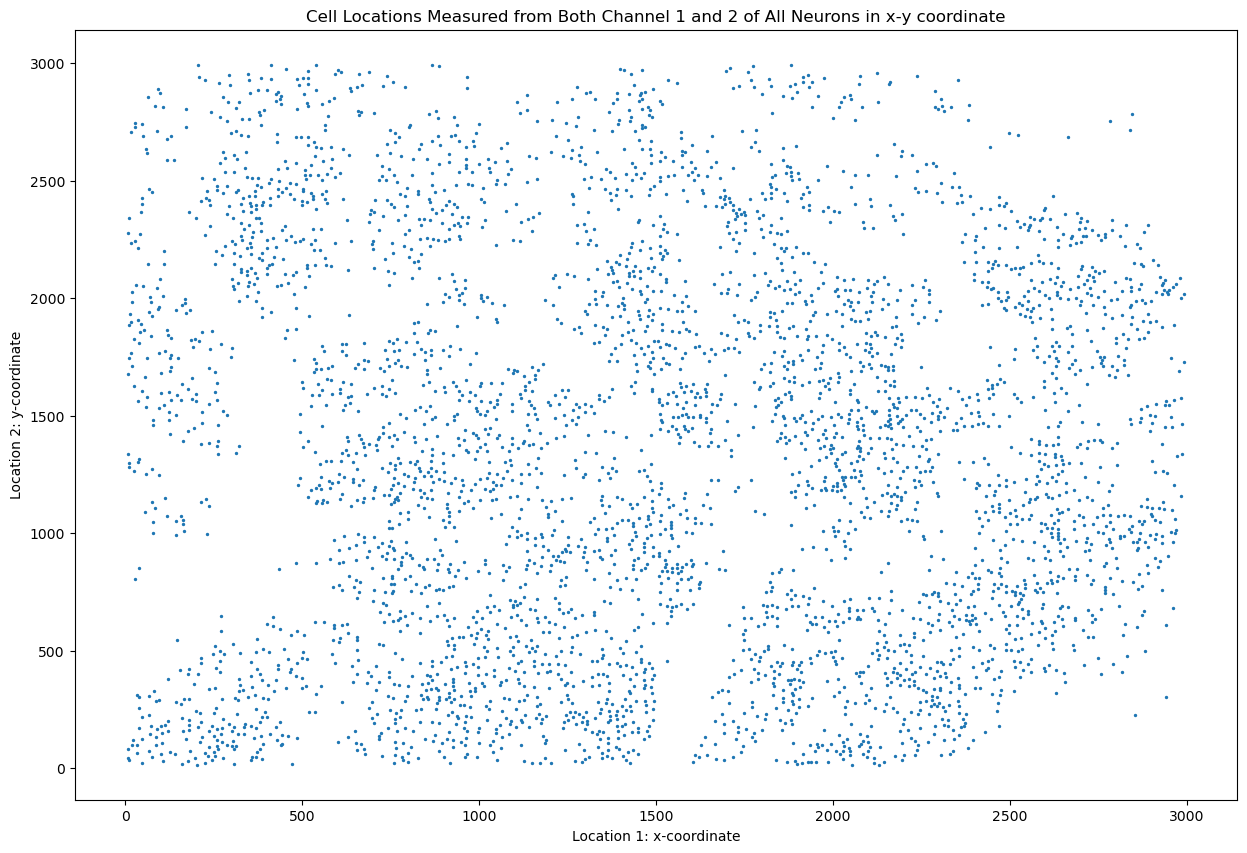

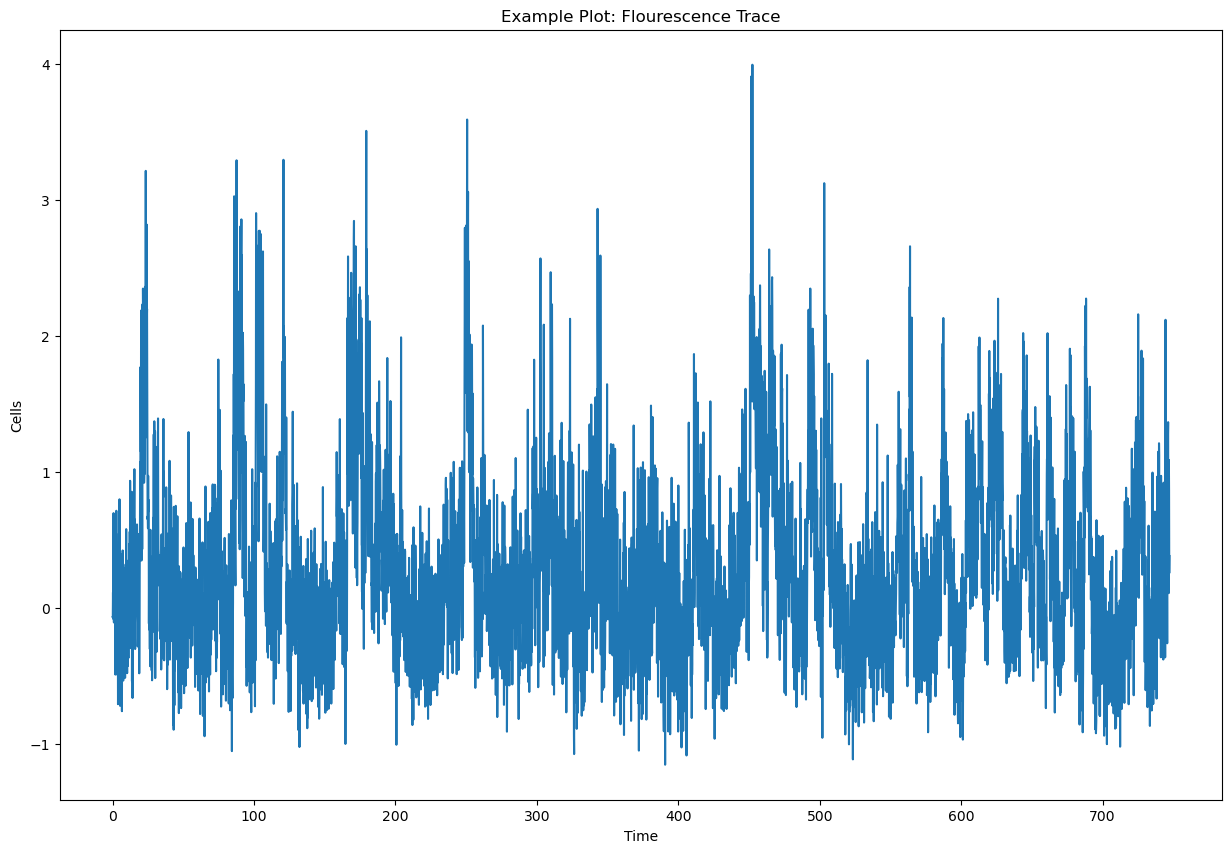

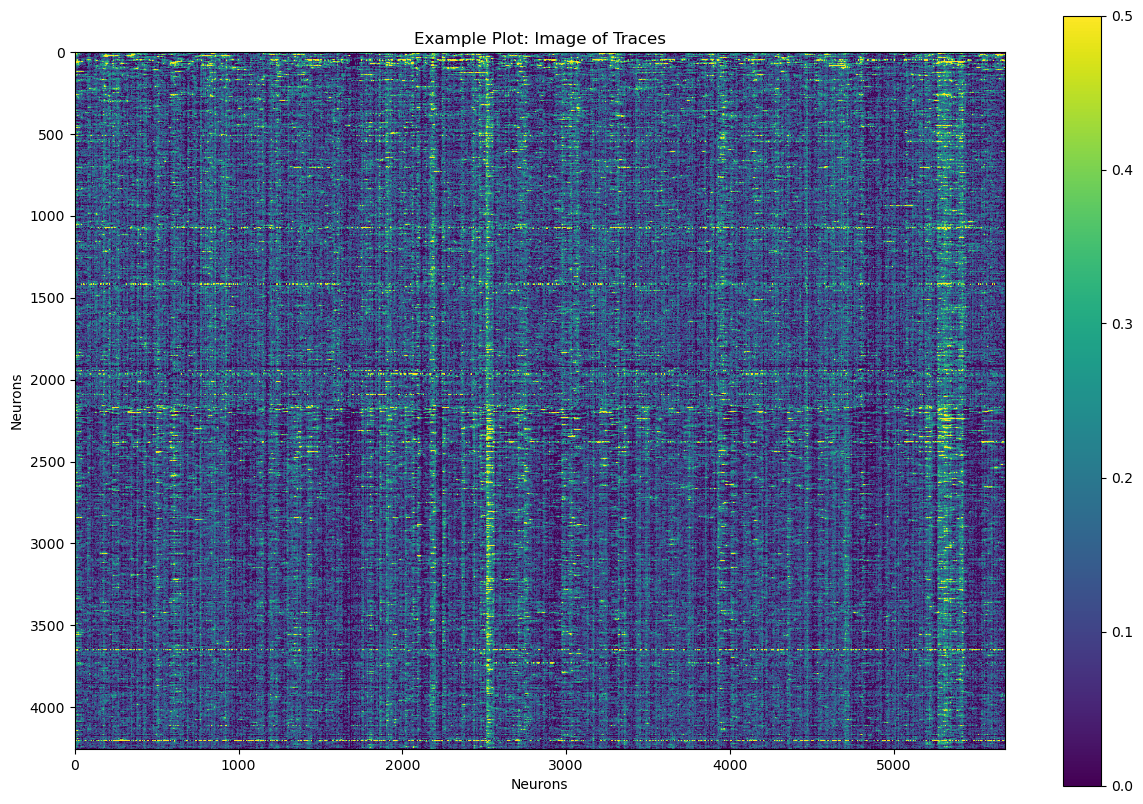

In [8]:
# getting x-y coordinates of neurons
XY1 = np.load("data/coord_file3_ch1.npy")  #channel 1
XY2 = np.load("data/coord_file3_ch2.npy")  #channel 2
xc1 = XY1[0,:]       
yc1 = XY1[1,:]
xc2 = XY2[0,:]
yc2 = XY2[1,:]
xc = np.hstack((xc1,xc2+1500))  # xc1, xc2: x-cordinates of ch1 and ch2
yc = np.hstack((yc1,yc2))       # yc1, yc2: y-coordinates of ch1 and ch2
fr = 7.6              # frame rate in Hz
t = np.linspace(0,(nframes-1)*1.0/fr,nframes)


#%% PLOTTING SECTION
# visualise cell locations
fig,ax = plt.subplots(figsize = (15, 10))
ax.scatter(xc,yc,2)
plt.title('Cell Locations Measured from Both Channel 1 and 2 of All Neurons in x-y coordinate')
plt.xlabel('Location 1: x-coordinate')
plt.ylabel('Location 2: y-coordinate')
plt.show()

#%% plot an example fluorescence trace
fig,ax = plt.subplots(figsize = (15,10))
ax.plot(t,dFonF[0,:]) # first column of dFonF
plt.title('Example Plot: Flourescence Trace')
plt.xlabel('Time')
plt.ylabel('Cells')
plt.show()

#%% show image of traces
fig,ax = plt.subplots(figsize = (15,10))
im = plt.imshow(dFonF,clim=[0,0.5],cmap=plt.cm.viridis)
plt.title('Example Plot: Image of Traces')
plt.xlabel('Neurons')
plt.ylabel('Neurons')
plt.colorbar(im, orientation = "vertical")  
plt.show()


Plotting the Floursecence time series for 5 chosen cells from the whole datset (dFonF) over the same x-axis.

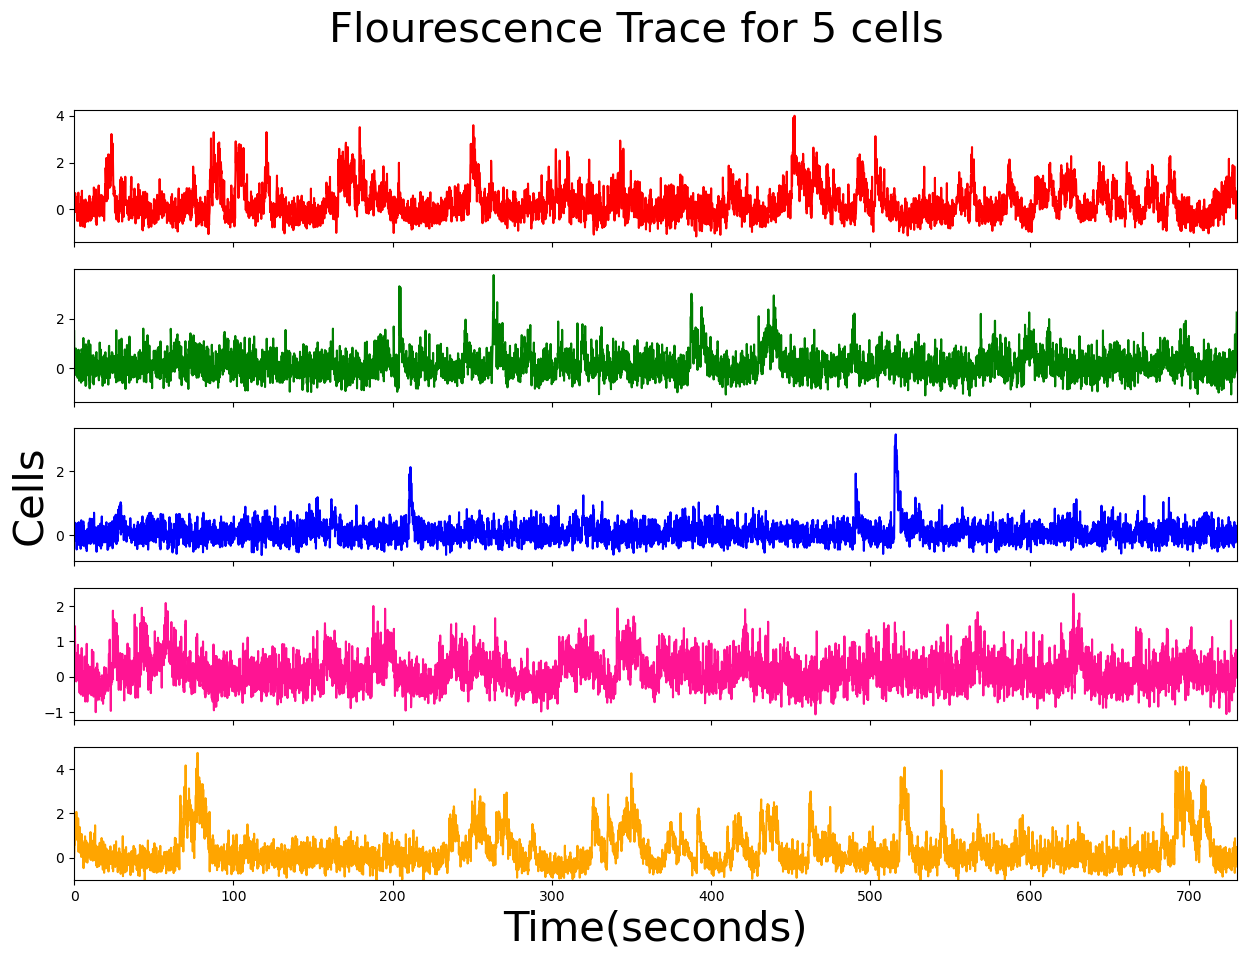

In [9]:
figs, ax2 = plt.subplots(5, figsize = (15, 10), sharex = True) #5 different plots for each cells

cell_1 = dFonF[0,:] # first cell
cell_2 = dFonF[1,:] # second cell
cell_3 = dFonF[2,:] # third cell
cell_4 = dFonF[3,:] # fourth cell
cell_5 = dFonF[4,:] # fifth cell

#cell flouresence activity over time for each cell
ax2 = ax2.flatten()
ax2[0].plot(t, cell_1, color = 'red') 
ax2[1].plot(t, cell_2, color = 'green')
ax2[2].plot(t, cell_3, color = 'blue')
ax2[3].plot(t, cell_4, color = 'deeppink')
ax2[4].plot(t, cell_5, color = 'orange')

figs.suptitle('Flourescence Trace for 5 cells', fontsize = 30)
#setting y-axis and x-axis
ax2[2].set_ylabel('Cells', fontsize = 30)
ax2[4].set_xlabel('Time(seconds)', fontsize = 30)
plt.xlim([0, 730])
plt.ylim([-1, 5])
plt.show()


# Q2 (written as Q3 in the paper)
Pearson's Correlation Coefficient Calculation

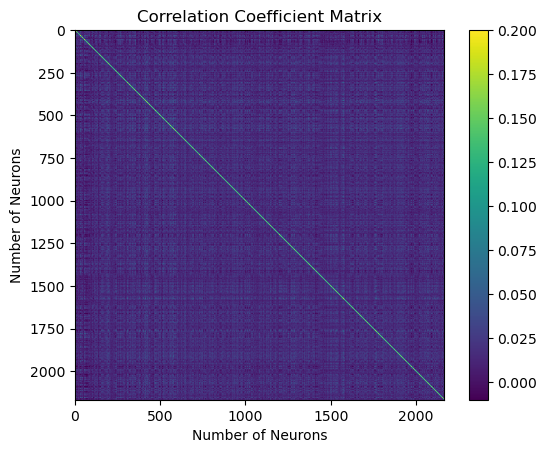

In [10]:
T_df = dFonF1.transpose() #we want to use the transpose of our dataset to mnake comparison between the cell lines vector by vector.
df = pd.DataFrame(T_df) #organizing data into a 2-D table comprised of rows and columns.

corr_p = df.corr() #finding the Pearson's Correlation Coefficient

#visualization of the Correlation Coefficient Matrix of calcium time series of cells
fig,ax = plt.subplots()
im = plt.imshow(corr_p,clim=[-0.01,0.2],cmap='viridis')
plt.title('Correlation Coefficient Matrix')
plt.xlabel('Number of Neurons')
plt.ylabel('Number of Neurons')
plt.colorbar(im, orientation = "vertical")  
plt.show()


The correlation matrix visualization shows the correlation of the calcium time series (deltaF/F) between cells. 
Pearson's Correlation Coefficient (r) can be any values between -1 and 1.  The closer to -1 or 1, the stronger the correlation between the two cells.  If the r value is equal to 0, then we can conclude that there is no correlation.

In [11]:
#plotting the distribution of the Pearson Correlation Coefficient matrix

size_d = len(correlation_df)
data = correlation_df.to_numpy() #changing the data from pandas to numpy
#data = data[np.triu_indices(size_d, k = 1)] #extracting the upper limit of the matrix 

# Plotting section: Histogram
plt.figure(figsize=(15,5))
hist, bins, _ = plt.hist(data.flatten(), bins=1000, density=False, range=(-1, 1), )
plt.legend()
plt.title('Distribution of Correlation Coefficients', fontsize = 18)
plt.ylabel('Number of neuron cells', size='x-large')
plt.xlabel('Correlation coefficients (1000 bins)', size= 'x-large')


NameError: name 'correlation_df' is not defined

The distribution of correlation coefficients illustrate that majority of the cells are not correlated to each other. This is because of the peak being around zero. However, when looked at the the right-hand side of the tail includes more values compared to the left-hand side. Meaning, the number of positive values are more than the negative values in this distribution.

# Q3 (written as Q4)
a) Plot the adjacency matrix for the graph as an image, with white indicating no edge and black indicating an edge.


Below, an undirected graph with nodes (n_vertices) mimicing neurons and edges assigned a binary value is shown. In here, if the r value is more than the 80th percentile of the distribution of these neurons, the value for the edges will be written as 1.
No self-edges allowed as stated in the question and the adjacency matrix has been plotted for adequate visualization.

In [ ]:
# a) Plotting the adjacency matrix for the graph
data_np = correlation_df.to_numpy() #convert DataFrame to NumPy array
n_vertices = len(data_np) # there will be same amount of vertices as the array 
correlation = [data_np[i, j] 
               for i in range(n_vertices)
               for j in range(n_vertices) if i!=j]
percentile = np.percentile(correlation, 80)
print('The 80th percentile is: ', percentile)


# Initialize the adjacency matrix
adj = np.zeros((n_vertices, n_vertices), dtype = float) #creating an adjacency matrix that has all the vertices.

for i in range(n_vertices):
    for j in range(i+1, n_vertices):
        if i!=j and data_np[i, j] > percentile:
            adj[i, j] = 1
            adj[j, i] = 1
print("adj is: ", adj)
print("percentile is ", percentile)

In [ ]:
#Representation of the adjacency matrix for graph at 10% sparsity
fig,ax = plt.subplots()
im = plt.imshow(adj,clim=[0.1,0.8],cmap='binary')
plt.title('Adjacency Matrix')
plt.colorbar(im, orientation = "vertical")  
plt.show()

# Q3 (written as Q4)

Creating a circular plot for as an alternative representation of our adjacency matrix. Fruchterman-Reingold force-directed algorithm helps us control the layout of our circular plot. This algorithm calculates the best position for the given nodes.

In [ ]:
G = nx.from_numpy_matrix(adj) #convert adjacency matrix into a numpy array
circles = nx.fruchterman_reingold_layout(G)
nx.draw(G, circles, with_labels = True)
plt.show()


#In here, my thought process was first to  convert adjacency matrix into s numpy array and store it 
#in the graph variable G. The function "nx.fruchterman_reingold_layout()" is to draw a layout in the 
#shape of circle where all the nodes are located and by using the "nx.draw()" function, the nodes will 
#be connected to the corresponding node.
#

# Q4 (written as Q5)

For this section, see the calculations for the average degree, global average clustering coefficient and the network diameter.

In [ ]:
# the average degree 
sum_degrees = 0
# loop through the rows of the adjacency matrix
for i in range(n_vertices):
    sum_degrees += np.count_nonzero(adj[i])
# calculating the average degree
average_degree = sum_degrees / n_vertices
print(average_degree)

In [ ]:
# average clustering coefficient
G = nx.from_numpy_matrix(adj)
avg_clust = nx.average_clustering(G)
print(avg_clust)

In [ ]:
# global clustering coefficient
G = nx.from_numpy_matrix(adj)
clustering = nx.transitivity(G) 
print(clustering)

In [ ]:
G = nx.from_numpy_matrix(adj)
diameter = nx.diameter(G)
print(diameter)

In [ ]:
# clustering coefficient
p = average_degree / len(adj)
print(p)

According to Small World networks, the average clstering coefficient has to be bigger than the clustering coefficient, as well as the diameter need to be very small to be considered as a Small World network. In this example, our clustering coefficient is found to be around 0.101 which is smaller than the average clistering coefficient (0.617). In this case, our network is classified as a Small World network as it meets alll the requirements.

In [ ]:
nx.draw_circular(G)

Erdos-Ronyi network uses Poisson distribution to compute the distribution of the degree of any given nodes. And for our network, a histogram has been plotted to show the variable as bars in series. Histogram uses a bell-shaped curve ha shas a 'peak' in the middle of the distribution and is classified as frequency distrbution where we're looking at the probability distribution of the the number of conections that one node has with another node in a given network.

In [ ]:
G = generate_ER(len(adj), 0.2, average_degree)
degrees = [G.degree(n) for n in G.nodes()]
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Degree Distribution for Erdos-Renyi graph', fontsize=15)
hist, bins, _ = plt.hist(degrees,  bins=50, density=False)

In [ ]:
deg = np.sum(adj, axis = 0)
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Observed degree distribution ', fontsize=15)
hist, bins, _ = plt.hist(deg,  bins=50, density=False)

The difference between Erdos-Renyi network and a Scale-Free network comes down to the comparison between their tail at the end of each disribution of the degree for large average clustering coefficient values. As we have large number of tail, we can say that the number of nodes are very high in this network.
It can be seen that for both methods, the mean of the distribution is centered around 430 degrees and after around 650 degrees, there is a drastic decrease at the right-hand side of the tail. The reason for this could be due to high connectivity of the nodes to each other.

Finally, this network is not a Scale-Free network as the tail of the distribution would not exhibit the Scale-Free network features which is  power law degree distribution that can only be seen on a logarithmic scale.